# 读取数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score as AUC
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

## 航班动态历史数据表

In [3]:
# 读取数据
fh = pd.read_csv("table_1.csv",sep=",")

In [4]:
fh.shape

(7518638, 9)

In [6]:
fh.head()

,Departure_airport,Arrive_airport,Flight number,Planned_departure_time,Planned arrive time,actual_departure_time,actual_arruve_tome,plane_number,flight_delay
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1,T
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2,T
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3,T
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4,T
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5,T


In [146]:
fh.tail()

,Departure_airport,Arrive_airport,Flight number,Planned_departure_time,Planned arrive time,actual_departure_time,actual_arruve_tome,plane_number,flight_delay
7518633,CKG,TNA,3U8507,1431301200,1431308700,1.431302e+09,1.431307e+09,7518634,T
7518634,DLC,WUH,CZ6514,1433057100,1433066400,1.433067e+09,1.433074e+09,7518635,T
7518635,HFE,CGO,JR1552,1431930000,1431935100,NaN,NaN,7518636,F
7518636,PEK,SHA,CA1557,1431747000,1431754800,1.431748e+09,1.431754e+09,7518637,T
7518637,CTU,LHW,CA4207,1432103400,1432108500,1.432105e+09,1.432108e+09,7518638,T


In [7]:
flight_history = fh[:50000] #取前50000个进行分析

In [8]:
# 修改列名,rename({:})
flight_history.columns = ["出发机场","到达机场","航班编号","计划起飞时间","计划到达时间","实际起飞时间","实际到达时间","ID",'是否延误']
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,ID,是否延误
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1,T
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2,T
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3,T
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4,T
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5,T


In [9]:
flight_history.info()#缺失情况，数据类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   出发机场    50000 non-null  object 
 1   到达机场    50000 non-null  object 
 2   航班编号    50000 non-null  object 
 3   计划起飞时间  50000 non-null  int64  
 4   计划到达时间  50000 non-null  int64  
 5   实际起飞时间  47364 non-null  float64
 6   实际到达时间  47373 non-null  float64
 7   ID      50000 non-null  int64  
 8   是否延误    50000 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.4+ MB


In [10]:
flight_history.drop(['实际起飞时间','实际到达时间'],axis=1,inplace=True)   #删除无意义特征，原地删除

In [11]:
flight_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   出发机场    50000 non-null  object
 1   到达机场    50000 non-null  object
 2   航班编号    50000 non-null  object
 3   计划起飞时间  50000 non-null  int64 
 4   计划到达时间  50000 non-null  int64 
 5   ID      50000 non-null  int64 
 6   是否延误    50000 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


In [12]:
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,ID,是否延误
0,HGH,DLC,CZ6328,1453809600,1453817100,1,T
1,SHA,XMN,FM9261,1452760800,1452767100,2,T
2,CAN,WNZ,ZH9597,1453800900,1453807500,3,T
3,SHA,ZUH,9C8819,1452120600,1452131100,4,T
4,SHE,TAO,TZ185,1452399000,1452406800,5,T


In [13]:
import time
time.time() #1970年到现在经过的秒数

1635492520.123745

In [14]:
pd.to_datetime(time.time(), utc=True, unit='s')

Timestamp('2021-10-29 07:28:45.792831182+0000', tz='UTC')

In [15]:
pd.to_datetime(time.time(), utc=True, unit='s').tz_convert('Asia/Shanghai') #时区转换

Timestamp('2021-10-29 15:29:08.045299768+0800', tz='Asia/Shanghai')

In [16]:
# 转换时间格式
flight_history["计划起飞时间"] = pd.to_datetime(flight_history["计划起飞时间"],unit="s")
flight_history["计划到达时间"] = pd.to_datetime(flight_history["计划到达时间"],unit="s")
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,ID,是否延误
0,HGH,DLC,CZ6328,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T
1,SHA,XMN,FM9261,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T
2,CAN,WNZ,ZH9597,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T
3,SHA,ZUH,9C8819,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T
4,SHE,TAO,TZ185,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T


## 机场城市对应表 

In [32]:
# 读取数据
city = pd.read_csv("table_2.csv",sep=",")

In [33]:
city.head()

,airport,city_name
0,AHJ,阿壩
1,AYN,安陽
2,HSC,韶關
3,HCJ,河池
4,XNT,邢臺


In [34]:
city.shape

(234, 2)

In [35]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airport    234 non-null    object
 1   city_name  233 non-null    object
dtypes: object(2)
memory usage: 3.8+ KB


In [36]:
city.dropna(inplace=True)  #删除缺失的样本

In [37]:
city.shape

(233, 2)

## 机场特情表

In [38]:
# 读取数据
case = pd.read_csv("table_3.csv",sep=",",encoding="UTF-8")

In [39]:
case.head(5)

,airport,collect_time,start_time,end_time,happen_content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,長沙機場航班延誤黃色預警提示：預計明日（5月1日）12:00-16:00長沙黃花機場受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8時-12時雷雨，期間進出港航班可能受到影響。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,預計，14時-17時小雷雨，期間進出港航班可能受到影響。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。


In [40]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airport         15877 non-null  object
 1   collect_time    15869 non-null  object
 2   start_time      15869 non-null  object
 3   end_time        15862 non-null  object
 4   happen_content  15868 non-null  object
dtypes: object(5)
memory usage: 620.4+ KB


In [41]:
case.dropna(subset=['airport'],inplace=True)  #删除机场信息为空的样本

In [42]:
case.shape

(15877, 5)

## 城市天气表

In [43]:
# 读取数据
weather = pd.read_csv("table_4.csv",sep=",")
weather.head()

,城市,天氣,最低氣溫,最高氣溫,日期
0,廈門,陰,21,26,2015/5/1
1,寧德,陣雨,19,25,2015/5/1
2,莆田,陣雨轉陰,20,26,2015/5/1
3,泉州,陰,22,26,2015/5/1
4,漳州,陣雨轉陰,22,28,2015/5/1


In [44]:
weather.columns = ["city_name","weather","temp_min","temp_max","date"]
weather.head()

,city_name,weather,temp_min,temp_max,date
0,廈門,陰,21,26,2015/5/1
1,寧德,陣雨,19,25,2015/5/1
2,莆田,陣雨轉陰,20,26,2015/5/1
3,泉州,陰,22,26,2015/5/1
4,漳州,陣雨轉陰,22,28,2015/5/1


In [45]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828469 entries, 0 to 828468
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   city_name  828469 non-null  object
 1   weather    828399 non-null  object
 2   temp_min   778400 non-null  object
 3   temp_max   678990 non-null  object
 4   date       828469 non-null  object
dtypes: object(5)
memory usage: 31.6+ MB


In [46]:
weather['weather'].unique()

array(['陰', '陣雨', '陣雨轉陰', '小雨轉陰', '小雨', '雷陣雨轉中雨', '小雨轉中雨', '雷陣雨轉大雨', '中雨',
       '中雨轉大雨', '雷陣雨', '陣雨轉中雨', '陣雨轉大雨', '小雨轉大雨', '陣雨轉雷陣雨', '大雨轉中雨',
       '中雨轉陣雨', '多雲轉小雨', '陣雨轉小雨', '小雨轉陣雨', '陣雨轉多雲', '多雲轉陰', '雷陣雨轉陰',
       '雷陣雨轉多雲', '多雲', '晴', '多雲轉晴', '大雨轉多雲', '中雨轉陰', '陣雨轉晴', '小雨轉多雲',
       '小雨轉晴', '陰轉晴', '多雲轉雷陣雨', '陰轉多雲', '雷陣雨轉陣雨', '多雲轉陣雨', '多雲轉中雨',
       '中雨轉小雨', '晴轉多雲', '大雨', '小雪', '陰轉小雨', '陰轉雨夾雪', '晴轉小雨', '晴轉陣雨',
       '雷陣雨轉小雨', '中雨轉多雲', '中雨轉晴', '霧', '晴轉雷陣雨', '晴轉陰', '浮塵', '小雪轉陣雪',
       '多雲轉雨夾雪', '雨夾雪', '大雨轉小雨', '大雨轉暴雨', '暴雨轉大雨', '大雨轉陰', '陰轉陣雨',
       '多雲轉大雨', '大雨轉陣雨', '陣雨轉霧', '中雪轉小雪', '多雲轉小雪', '小雪轉陰', '小雪轉多雲',
       '雨夾雪轉小雨', '陰轉小雪', '雨夾雪轉多雲', '浮塵轉晴', '陰轉陣雪', '雨夾雪轉小雪', '小雨轉雨夾雪',
       '霧轉陰', '暴雨轉小雨', '陰轉雷陣雨', '中雨轉雷陣雨', '陰轉中雨', '小雪轉中雪', '大雨轉雷陣雨',
       '大雪轉小雪', '晴轉中雨', '晴轉雨夾雪', '小雨轉雷陣雨', '揚沙轉晴', '小雪轉大雪', '陰轉大雨',
       '陰轉暴雨', '暴雨轉陣雨', '雨夾雪轉晴', '暴雨轉陰', '陰轉霧', '揚沙轉小雨', '晴轉揚沙', '多雲轉陣雪',
       '揚沙轉多雲', '揚沙轉陣雨', '陣雪', '雷陣雨轉暴雨', '小到中雨', '中雨轉雨夾雪', '揚沙轉小雪',
       '多雲轉浮塵', '揚沙轉浮塵', 

In [47]:
weather['weather'].nunique() #取值的数量

436

In [48]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828469 entries, 0 to 828468
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   city_name  828469 non-null  object
 1   weather    828399 non-null  object
 2   temp_min   778400 non-null  object
 3   temp_max   678990 non-null  object
 4   date       828469 non-null  object
dtypes: object(5)
memory usage: 31.6+ MB


In [49]:
weather.duplicated(subset=['city_name','date']).sum()

6066

In [50]:
#对重复城市名字和日期的天气进行合并
weather1=weather[['city_name','date','weather']].groupby(['city_name','date'])['weather'].apply(lambda x:x.str.cat(sep='')).reset_index()

In [51]:
weather1

,city_name,date,weather
0,奧克拉荷馬城,2015/11/13,多雲
1,奧克拉荷馬城,2015/11/14,陰轉小雨
2,奧克拉荷馬城,2015/11/15,小雨
3,奧克拉荷馬城,2015/11/16,小雨轉中雨
4,奧克拉荷馬城,2015/11/17,陰轉多雲
...,...,...,...
822398,龐艾,2017/5/5,陣雨
822399,龐艾,2017/5/6,傾盆大雨
822400,龐艾,2017/5/7,雨逐漸停止
822401,龐艾,2017/5/8,風


# 数据探索与特征提取

## 航班动态历史数据表

### 将航班编号做分割

In [52]:
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,ID,是否延误
0,HGH,DLC,CZ6328,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T
1,SHA,XMN,FM9261,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T
2,CAN,WNZ,ZH9597,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T
3,SHA,ZUH,9C8819,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T
4,SHE,TAO,TZ185,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T


In [53]:
flight_history.loc[:,"航班编号"].map(lambda x:x[:2])  #方法1  函数方法 用于实现比较复杂的运算

0        CZ
1        FM
2        ZH
3        9C
4        TZ
         ..
49995    CZ
49996    CZ
49997    CZ
49998    MU
49999    CZ
Name: 航班编号, Length: 50000, dtype: object

In [54]:
flight_history.loc[:,"航班编号"].str.slice(0,2) #取出航班编号  方法2  str向量化方法

0        CZ
1        FM
2        ZH
3        9C
4        TZ
         ..
49995    CZ
49996    CZ
49997    CZ
49998    MU
49999    CZ
Name: 航班编号, Length: 50000, dtype: object

In [55]:
flight_history["航空公司"] = flight_history.loc[:,"航班编号"].apply(lambda x:x[:2])  #航空公司
flight_history["起飞地点"] = flight_history.loc[:,"航班编号"].apply(lambda x:x[2:3]) #起飞地点
flight_history["到达地点"] = flight_history.loc[:,"航班编号"].apply(lambda x:x[3:4]) #到达地点

In [56]:
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点
0,HGH,DLC,CZ6328,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3
1,SHA,XMN,FM9261,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2
2,CAN,WNZ,ZH9597,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5
3,SHA,ZUH,9C8819,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8
4,SHE,TAO,TZ185,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8


### 判断该班次是否为候补飞机

In [57]:
flight_history["是否为候补飞机"] = flight_history.loc[:,"航班编号"].apply(lambda x:x[-1])  #选出最后一个字符
flight_history["是否为候补飞机"] = flight_history["是否为候补飞机"].str.isalpha()#判断是否字母
flight_history.head()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机
0,HGH,DLC,CZ6328,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False
1,SHA,XMN,FM9261,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False
2,CAN,WNZ,ZH9597,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False
3,SHA,ZUH,9C8819,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False
4,SHE,TAO,TZ185,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False


In [58]:
del flight_history["航班编号"]  #删除航班编号信息

In [59]:
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False


### 将出发时间分类成时间区段

In [60]:
df1 = flight_history[["计划起飞时间"]]
df1.head()

,计划起飞时间
0,2016-01-26 12:00:00
1,2016-01-14 08:40:00
2,2016-01-26 09:35:00
3,2016-01-06 22:50:00
4,2016-01-10 04:10:00


In [61]:
df1["Hour"] = df1["计划起飞时间"].apply(lambda x:x.hour)     # 从0到24  
df1.head()

,计划起飞时间,Hour
0,2016-01-26 12:00:00,12
1,2016-01-14 08:40:00,8
2,2016-01-26 09:35:00,9
3,2016-01-06 22:50:00,22
4,2016-01-10 04:10:00,4


按照凌晨、上午、下午、晚上划分

In [62]:
#分箱处理，自定义分箱
hour_bins = [-1,6,12,18,24]
bin_names = ["凌晨","上午","下午","晚上"]
df1["起飞时间段"] = pd.cut(df1["Hour"],bins=hour_bins,labels=bin_names)
df1.head()

,计划起飞时间,Hour,起飞时间段
0,2016-01-26 12:00:00,12,上午
1,2016-01-14 08:40:00,8,上午
2,2016-01-26 09:35:00,9,上午
3,2016-01-06 22:50:00,22,晚上
4,2016-01-10 04:10:00,4,凌晨


In [63]:
flight_history['起飞时间段']=df1["起飞时间段"]
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨


### 到达时间分成区间段

In [64]:
#到达时间处理
df2 = flight_history[["计划到达时间"]]

In [65]:
df2["Hour"] = df2["计划到达时间"].apply(lambda x:x.hour)
df2.head()

,计划到达时间,Hour
0,2016-01-26 14:05:00,14
1,2016-01-14 10:25:00,10
2,2016-01-26 11:25:00,11
3,2016-01-07 01:45:00,1
4,2016-01-10 06:20:00,6


In [66]:
df2["到达时间段"] = pd.cut(df2["Hour"],bins=hour_bins,labels=bin_names)
df2.head()

,计划到达时间,Hour,到达时间段
0,2016-01-26 14:05:00,14,下午
1,2016-01-14 10:25:00,10,上午
2,2016-01-26 11:25:00,11,上午
3,2016-01-07 01:45:00,1,凌晨
4,2016-01-10 06:20:00,6,凌晨


In [67]:
flight_history['到达时间段']=df2["到达时间段"]
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨


### 判断该航班的飞行时间是否为周末

In [68]:
df1["是否周末"] = flight_history["计划起飞时间"].apply(lambda x:x.dayofweek) #从0开始，映射到0-6，5和6为周末  
df1.head()

,计划起飞时间,Hour,起飞时间段,是否周末
0,2016-01-26 12:00:00,12,上午,1
1,2016-01-14 08:40:00,8,上午,3
2,2016-01-26 09:35:00,9,上午,1
3,2016-01-06 22:50:00,22,晚上,2
4,2016-01-10 04:10:00,4,凌晨,6


In [69]:
df1['是否周末']>4  #是否大于4

0        False
1        False
2        False
3        False
4         True
         ...  
49995    False
49996    False
49997    False
49998    False
49999     True
Name: 是否周末, Length: 50000, dtype: bool

In [70]:
flight_history['是否周末']=df1['是否周末']>4
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True


### 计算飞行时间

In [71]:
flight_history["飞行时间"] = flight_history["计划到达时间"] - flight_history["计划起飞时间"]
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,02:05:00
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,01:45:00
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,01:50:00
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,02:55:00
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,02:10:00


In [72]:
pd.Timedelta('02:05:00').seconds

7500

In [73]:
#将飞行时间转换为数值型，得到飞行的小时数（先转换为秒，再转换为小时）
pd.Timedelta('02:05:00').seconds/3600 #Timedelta对象有属性：weeks、days、seconds、milliseconds、microseconds和nanoseconds等：

2.0833333333333335

In [74]:
flight_history["飞行时间"]=flight_history["飞行时间"].apply(lambda x:pd.Timedelta(x).seconds/3600 )

In [76]:
flight_history.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667


## 机场城市对应表和城市天气表

In [77]:
weather1.head()  #城市天气表

,city_name,date,weather
0,奧克拉荷馬城,2015/11/13,多雲
1,奧克拉荷馬城,2015/11/14,陰轉小雨
2,奧克拉荷馬城,2015/11/15,小雨
3,奧克拉荷馬城,2015/11/16,小雨轉中雨
4,奧克拉荷馬城,2015/11/17,陰轉多雲


In [78]:
weather1.shape

(822403, 3)

In [79]:
weather1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822403 entries, 0 to 822402
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   city_name  822403 non-null  object
 1   date       822403 non-null  object
 2   weather    822403 non-null  object
dtypes: object(3)
memory usage: 18.8+ MB


In [80]:
city.head() #城市和机场对应信息

,airport,city_name
0,AHJ,阿壩
1,AYN,安陽
2,HSC,韶關
3,HCJ,河池
4,XNT,邢臺


In [81]:
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233 entries, 0 to 233
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   airport    233 non-null    object
 1   city_name  233 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [207]:
city.shape

(233, 2)

In [82]:
airport_weather = pd.merge(weather1,city,on="city_name",how="left")
airport_weather.shape

(824689, 4)

In [83]:
airport_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824689 entries, 0 to 824688
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   city_name  824689 non-null  object
 1   date       824689 non-null  object
 2   weather    824689 non-null  object
 3   airport    148356 non-null  object
dtypes: object(4)
memory usage: 31.5+ MB


In [84]:
airport_weather.dropna(subset=['airport'],axis=0,inplace=True)   #删除缺失的机场信息

In [85]:
airport_weather.shape

(148356, 4)

In [212]:
airport_weather  #机场天气表

,city_name,date,weather,airport
1143,三亞,2015/10/1,多雲轉雷陣雨,SYX
1144,三亞,2015/10/10,中雨,SYX
1145,三亞,2015/10/11,小雨轉中雨,SYX
1146,三亞,2015/10/12,陣雨轉中雨,SYX
1147,三亞,2015/10/13,中雨轉小雨,SYX
...,...,...,...,...
823880,龍岩,2017/5/5,陰轉多雲,LCX
823881,龍岩,2017/5/6,多雲,LCX
823882,龍岩,2017/5/7,多雲轉小雨,LCX
823883,龍岩,2017/5/8,小雨轉中雨,LCX


In [87]:
airport_weather['weather'].nunique() #天气取值特别多，类别过多，还需要进一步处理

441

In [88]:
airport_weather['weather'].unique()

array(['多雲轉雷陣雨', '中雨', '小雨轉中雨', '陣雨轉中雨', '中雨轉小雨', '陣雨', '多雲', '晴轉多雲',
       '陣雨轉大雨', '大雨轉小雨', '雷陣雨轉小雨', '陣雨轉多雲', '多雲轉陣雨', '陣雨轉陰', '陰轉多雲',
       '多雲轉小雨', '陰', '雷陣雨轉陣雨', '雷陣雨轉多雲', '中雨轉陣雨', '大雨', '大雨轉中雨', '大雨轉陣雨',
       '雷陣雨', '大雨轉暴雨', '小雨轉陣雨', '小雨轉多雲', '小雨', '多雲轉陰', '小雨轉陰', '陣雨轉暴雨',
       '暴雨轉大雨', '中雨轉多雲', '陣雨轉小雨', '多雲轉大雨', '多雲轉晴', '晴', '多雲多雲', '大雨轉大暴雨',
       '暴雨', '小雨轉大雨', '中雨轉陰', '大雨轉雷陣雨', '陰轉小雨', '暴雨轉小雨', '小雨轉雷陣雨', '小雪轉陰',
       '陰轉陣雨', '晴轉陣雨', '中雨轉大雨', '晴轉陰', '陰轉晴', '陰轉中雨', '雷陣雨轉中雨', '多雲轉中雨',
       '雷陣雨轉陰', '雷陣雨轉晴', '陰轉暴雨', '雷陣雨轉大雨', '中雨轉小雨小雨轉中雨', '中雨轉暴雨', '陰轉大雨',
       '暴雨轉中雨', '陰轉雨夾雪', '雨夾雪轉小雨', '雨夾雪', '小雨轉晴', '雨夾雪轉多雲', '陰轉雷陣雨',
       '大雨轉陰', '中雨轉雷陣雨', '小雨轉雨夾雪', '小雪轉多雲', '陣雨轉晴', '小雨轉霧', '陰轉霧', '晴轉小雨',
       '陣雨轉雷陣雨', '中雪', '多雲轉霧', '晴轉霧', '中雨轉雨夾雪', '中雪轉雨夾雪雨夾雪轉陰', '陰小雨轉多雲',
       '雨夾雪轉小雪', '濃霧轉霧', '霧轉多雲', '霧轉晴', '多雲轉雨夾雪', '濃霧轉多雲', '多雲轉小雪', '小雪',
       '晴轉雷陣雨', '陰轉小雪', '小雪轉晴', '雨夾雪轉陰', '多雲轉暴雨', '小雨轉小雪', '陰陰轉小雪',
       '多雲轉陰多雲轉陰', '雨夾雪轉晴', '多雲小雨', '多雲陰轉多雲', '小雨轉陰小雨轉陰', '浮

## 天气处理

In [89]:
airport_weather.head()

,city_name,date,weather,airport
1143,三亞,2015/10/1,多雲轉雷陣雨,SYX
1144,三亞,2015/10/10,中雨,SYX
1145,三亞,2015/10/11,小雨轉中雨,SYX
1146,三亞,2015/10/12,陣雨轉中雨,SYX
1147,三亞,2015/10/13,中雨轉小雨,SYX


### 繁体和简体转换

In [90]:
#繁体转简体
from langconv import *
def Traditional2Simplified(sentence):
  sentence = Converter('zh-hans').convert(sentence)
  return sentence

traditional_sentence = '憂郁的臺灣烏龜,多雲轉雷陣雨'
Traditional2Simplified(traditional_sentence)

'忧郁的台湾乌龟,多云转雷阵雨'

In [91]:
#简体转繁体
from langconv import *
def Simplified2Traditional(sentence):
  sentence = Converter('zh-hant').convert(sentence)
  return sentence

simplified_sentence = '忧郁的台湾乌龟,多云转雷阵雨'
Simplified2Traditional(simplified_sentence)

'憂郁的臺灣烏龜,多雲轉雷陣雨'

In [92]:
airport_weather['weather']=airport_weather['weather'].apply(Traditional2Simplified)

In [93]:
airport_weather.head()

,city_name,date,weather,airport
1143,三亞,2015/10/1,多云转雷阵雨,SYX
1144,三亞,2015/10/10,中雨,SYX
1145,三亞,2015/10/11,小雨转中雨,SYX
1146,三亞,2015/10/12,阵雨转中雨,SYX
1147,三亞,2015/10/13,中雨转小雨,SYX


### 天气聚类

In [94]:
airport_weather['weather'].unique()

array(['多云转雷阵雨', '中雨', '小雨转中雨', '阵雨转中雨', '中雨转小雨', '阵雨', '多云', '晴转多云',
       '阵雨转大雨', '大雨转小雨', '雷阵雨转小雨', '阵雨转多云', '多云转阵雨', '阵雨转阴', '阴转多云',
       '多云转小雨', '阴', '雷阵雨转阵雨', '雷阵雨转多云', '中雨转阵雨', '大雨', '大雨转中雨', '大雨转阵雨',
       '雷阵雨', '大雨转暴雨', '小雨转阵雨', '小雨转多云', '小雨', '多云转阴', '小雨转阴', '阵雨转暴雨',
       '暴雨转大雨', '中雨转多云', '阵雨转小雨', '多云转大雨', '多云转晴', '晴', '多云多云', '大雨转大暴雨',
       '暴雨', '小雨转大雨', '中雨转阴', '大雨转雷阵雨', '阴转小雨', '暴雨转小雨', '小雨转雷阵雨', '小雪转阴',
       '阴转阵雨', '晴转阵雨', '中雨转大雨', '晴转阴', '阴转晴', '阴转中雨', '雷阵雨转中雨', '多云转中雨',
       '雷阵雨转阴', '雷阵雨转晴', '阴转暴雨', '雷阵雨转大雨', '中雨转小雨小雨转中雨', '中雨转暴雨', '阴转大雨',
       '暴雨转中雨', '阴转雨夹雪', '雨夹雪转小雨', '雨夹雪', '小雨转晴', '雨夹雪转多云', '阴转雷阵雨',
       '大雨转阴', '中雨转雷阵雨', '小雨转雨夹雪', '小雪转多云', '阵雨转晴', '小雨转雾', '阴转雾', '晴转小雨',
       '阵雨转雷阵雨', '中雪', '多云转雾', '晴转雾', '中雨转雨夹雪', '中雪转雨夹雪雨夹雪转阴', '阴小雨转多云',
       '雨夹雪转小雪', '浓雾转雾', '雾转多云', '雾转晴', '多云转雨夹雪', '浓雾转多云', '多云转小雪', '小雪',
       '晴转雷阵雨', '阴转小雪', '小雪转晴', '雨夹雪转阴', '多云转暴雨', '小雨转小雪', '阴阴转小雪',
       '多云转阴多云转阴', '雨夹雪转晴', '多云小雨', '多云阴转多云', '小雨转阴小雨转阴', '浮

In [95]:
#天气归类，把天气聚到这些类别中
L = ["暴雨", "大雨", "雷阵雨",'中雨','扬沙','雪',"阵雨",'霾','浓雾','冻雨',"雾",'沙尘暴']  #把天气划分到这些类别

In [96]:
s = '暴雨转小雨'
for i in L:
    if i in s:
        weather = i
        break
    else:
        weather='不重要'
weather

'暴雨'

In [97]:
s = '多云转阴'
for i in L:
    if i in s:
        weather = i
        break
    else:
        weather='不重要'
weather

'不重要'

In [98]:
s = '暴雨转大雨'
for i in L:
    if i in s:
        weather = i
        break
    else:
        weather='不重要'
weather

'暴雨'

In [100]:
L = ["暴雨", "大雨", "雷阵雨",'中雨','扬沙','雪',"阵雨",'霾','浓雾','冻雨',"雾",'沙尘暴']  #把天气划分到这些类别
def f(x):
    for i in L:
        if i in x:
            weather=i
            break
        else:
            weather='不重要'
    return weather

In [101]:
airport_weather['天气'] = airport_weather.weather.map(f)

In [102]:
airport_weather.head()

,city_name,date,weather,airport,天气
1143,三亞,2015/10/1,多云转雷阵雨,SYX,雷阵雨
1144,三亞,2015/10/10,中雨,SYX,中雨
1145,三亞,2015/10/11,小雨转中雨,SYX,中雨
1146,三亞,2015/10/12,阵雨转中雨,SYX,中雨
1147,三亞,2015/10/13,中雨转小雨,SYX,中雨


In [103]:
airport_weather['天气'].unique()

array(['雷阵雨', '中雨', '阵雨', '不重要', '大雨', '暴雨', '雪', '雾', '浓雾', '冻雨', '扬沙',
       '霾', '沙尘暴'], dtype=object)

### 天气添加到原来动态历史数据表

In [114]:
airport_weather["date"] = pd.to_datetime(airport_weather["date"])
airport_weather.head()

,city_name,date,weather,airport,天气
1143,三亞,2015-10-01,多云转雷阵雨,SYX,雷阵雨
1144,三亞,2015-10-10,中雨,SYX,中雨
1145,三亞,2015-10-11,小雨转中雨,SYX,中雨
1146,三亞,2015-10-12,阵雨转中雨,SYX,中雨
1147,三亞,2015-10-13,中雨转小雨,SYX,中雨


In [115]:
airport_weather["date"] = airport_weather["date"].astype(str)  #转换为字符串，后续做拼接
airport_weather.head()

,city_name,date,weather,airport,天气
1143,三亞,2015-10-01,多云转雷阵雨,SYX,雷阵雨
1144,三亞,2015-10-10,中雨,SYX,中雨
1145,三亞,2015-10-11,小雨转中雨,SYX,中雨
1146,三亞,2015-10-12,阵雨转中雨,SYX,中雨
1147,三亞,2015-10-13,中雨转小雨,SYX,中雨


#### 出发机场天气

In [116]:
airport_weather_departure=airport_weather.copy()#出发机场天气

In [117]:
airport_weather_departure.rename(columns = {"airport": "出发机场",'date':'时间','天气':'出发机场天气'},inplace=True)
airport_weather_departure.head()

,city_name,时间,weather,出发机场,出发机场天气
1143,三亞,2015-10-01,多云转雷阵雨,SYX,雷阵雨
1144,三亞,2015-10-10,中雨,SYX,中雨
1145,三亞,2015-10-11,小雨转中雨,SYX,中雨
1146,三亞,2015-10-12,阵雨转中雨,SYX,中雨
1147,三亞,2015-10-13,中雨转小雨,SYX,中雨


In [118]:
airport_weather_departure.drop(['city_name','weather'],axis=1,inplace=True)#删除多余字段

In [119]:
airport_weather_departure.head()

,时间,出发机场,出发机场天气
1143,2015-10-01,SYX,雷阵雨
1144,2015-10-10,SYX,中雨
1145,2015-10-11,SYX,中雨
1146,2015-10-12,SYX,中雨
1147,2015-10-13,SYX,中雨


In [120]:
flight_history1=flight_history.copy()  #新拷贝一份

In [121]:
flight_history1.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667


In [122]:
flight_history1["时间"] = flight_history1["计划起飞时间"]   #对起飞时间备份
flight_history1.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,时间
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,2016-01-26 12:00:00
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,2016-01-14 08:40:00
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,2016-01-26 09:35:00
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,2016-01-06 22:50:00
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,2016-01-10 04:10:00


In [123]:
flight_history1["时间"] = flight_history1["时间"].astype(str).apply(lambda x:x[:10])
flight_history1.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,时间
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,2016-01-26
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,2016-01-14
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,2016-01-26
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,2016-01-06
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,2016-01-10


In [124]:
flight2 = pd.merge(flight_history1,airport_weather_departure,on = ['时间','出发机场'],how='left')
flight2.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,时间,出发机场天气
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,2016-01-26,不重要
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,2016-01-14,不重要
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,2016-01-26,中雨
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,2016-01-06,不重要
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,2016-01-10,不重要


In [125]:
flight2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   出发机场     50000 non-null  object        
 1   到达机场     50000 non-null  object        
 2   计划起飞时间   50000 non-null  datetime64[ns]
 3   计划到达时间   50000 non-null  datetime64[ns]
 4   ID       50000 non-null  int64         
 5   是否延误     50000 non-null  object        
 6   航空公司     50000 non-null  object        
 7   起飞地点     50000 non-null  object        
 8   到达地点     50000 non-null  object        
 9   是否为候补飞机  50000 non-null  bool          
 10  起飞时间段    50000 non-null  category      
 11  到达时间段    50000 non-null  category      
 12  是否周末     50000 non-null  bool          
 13  飞行时间     50000 non-null  float64       
 14  时间       50000 non-null  object        
 15  出发机场天气   49136 non-null  object        
dtypes: bool(2), category(2), datetime64[ns](2), float64(1), int64(1), object(8)


#### 到达机场天气

In [126]:
airport_weather_arrive=airport_weather.copy()#到达机场天气
airport_weather_arrive.rename(columns = {"airport": "到达机场",'date':'时间','天气':'达到机场天气'},inplace=True)
airport_weather_arrive.head()

,city_name,时间,weather,到达机场,达到机场天气
1143,三亞,2015-10-01,多云转雷阵雨,SYX,雷阵雨
1144,三亞,2015-10-10,中雨,SYX,中雨
1145,三亞,2015-10-11,小雨转中雨,SYX,中雨
1146,三亞,2015-10-12,阵雨转中雨,SYX,中雨
1147,三亞,2015-10-13,中雨转小雨,SYX,中雨


In [127]:
airport_weather_arrive.drop(['city_name','weather'],axis=1,inplace=True)#删除多余字段

In [128]:
airport_weather_arrive.head()

,时间,到达机场,达到机场天气
1143,2015-10-01,SYX,雷阵雨
1144,2015-10-10,SYX,中雨
1145,2015-10-11,SYX,中雨
1146,2015-10-12,SYX,中雨
1147,2015-10-13,SYX,中雨


In [129]:
flight2.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,时间,出发机场天气
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,2016-01-26,不重要
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,2016-01-14,不重要
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,2016-01-26,中雨
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,2016-01-06,不重要
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,2016-01-10,不重要


In [130]:
flight3 = pd.merge(flight2,airport_weather_arrive,on = ['时间','到达机场'],how='left')
flight3.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,时间,出发机场天气,达到机场天气
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,2016-01-26,不重要,不重要
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,2016-01-14,不重要,阵雨
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,2016-01-26,中雨,不重要
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,2016-01-06,不重要,不重要
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,2016-01-10,不重要,雾


In [131]:
flight3.drop(['时间'],inplace=True,axis=1)

In [132]:
flight3.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,中雨,不重要
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,不重要,不重要
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,不重要,雾


In [133]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   出发机场     50000 non-null  object        
 1   到达机场     50000 non-null  object        
 2   计划起飞时间   50000 non-null  datetime64[ns]
 3   计划到达时间   50000 non-null  datetime64[ns]
 4   ID       50000 non-null  int64         
 5   是否延误     50000 non-null  object        
 6   航空公司     50000 non-null  object        
 7   起飞地点     50000 non-null  object        
 8   到达地点     50000 non-null  object        
 9   是否为候补飞机  50000 non-null  bool          
 10  起飞时间段    50000 non-null  category      
 11  到达时间段    50000 non-null  category      
 12  是否周末     50000 non-null  bool          
 13  飞行时间     50000 non-null  float64       
 14  出发机场天气   49136 non-null  object        
 15  达到机场天气   49100 non-null  object        
dtypes: bool(2), category(2), datetime64[ns](2), float64(1), int64(1), object(8)


In [134]:
flight3['出发机场天气'].fillna('不重要',inplace=True)
flight3['达到机场天气'].fillna('不重要',inplace=True)

In [135]:
flight3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   出发机场     50000 non-null  object        
 1   到达机场     50000 non-null  object        
 2   计划起飞时间   50000 non-null  datetime64[ns]
 3   计划到达时间   50000 non-null  datetime64[ns]
 4   ID       50000 non-null  int64         
 5   是否延误     50000 non-null  object        
 6   航空公司     50000 non-null  object        
 7   起飞地点     50000 non-null  object        
 8   到达地点     50000 non-null  object        
 9   是否为候补飞机  50000 non-null  bool          
 10  起飞时间段    50000 non-null  category      
 11  到达时间段    50000 non-null  category      
 12  是否周末     50000 non-null  bool          
 13  飞行时间     50000 non-null  float64       
 14  出发机场天气   50000 non-null  object        
 15  达到机场天气   50000 non-null  object        
dtypes: bool(2), category(2), datetime64[ns](2), float64(1), int64(1), object(8)


In [136]:
flight3.to_csv("flight3.csv",index=False)  #保存

In [137]:
flight3.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,中雨,不重要
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,不重要,不重要
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,不重要,雾


In [138]:
flight3.shape

(50000, 16)

## 机场特情表处理

In [140]:
#处理思路，看飞机的起飞和降落时间有没有落在特情发生的时间段中，对特情只判断是否有特情

### 起飞时间是否落在特情时间段中

In [141]:
case.head()

,airport,collect_time,start_time,end_time,happen_content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,長沙機場航班延誤黃色預警提示：預計明日（5月1日）12:00-16:00長沙黃花機場受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8時-12時雷雨，期間進出港航班可能受到影響。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,預計，14時-17時小雷雨，期間進出港航班可能受到影響。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。


In [142]:
case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15877 entries, 0 to 15879
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   airport         15877 non-null  object
 1   collect_time    15869 non-null  object
 2   start_time      15869 non-null  object
 3   end_time        15862 non-null  object
 4   happen_content  15868 non-null  object
dtypes: object(5)
memory usage: 744.2+ KB


In [143]:
case.dropna(inplace=True) #删除有缺失的行

In [144]:
case.shape

(15861, 5)

机场特情表“airport”大小写转换

In [145]:
case["airport"] = case["airport"].str.upper()    #大小，upper，lower
case.head()

,airport,collect_time,start_time,end_time,happen_content
0,CSX,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,長沙機場航班延誤黃色預警提示：預計明日（5月1日）12:00-16:00長沙黃花機場受雷雨天...
1,WUH,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8時-12時雷雨，期間進出港航班可能受到影響。
2,KHN,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,預計，14時-17時小雷雨，期間進出港航班可能受到影響。
3,SWA,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。
4,ZHA,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,預計，13時-17時雷雨，期間進出港航班可能受到影響。


时间栏位统一

In [146]:
# 类型转换
case["start_time"] = case["start_time"].astype(str)#将时间格式变成字符型
case["end_time"] = case["end_time"].astype(str)

In [147]:
# 去掉"Z"
case["start_time"] = case.loc[:,"start_time"].str.strip('zZ')  #去掉首尾的Z     方法1
case["end_time"] = case.loc[:,"end_time"].apply(lambda x:x[:19]) # 截取前19位   方法2
case.head()

,airport,collect_time,start_time,end_time,happen_content
0,CSX,2015-04-30 19:52:45Z,2015-05-01 12:00:00,2015-05-01 16:00:00,長沙機場航班延誤黃色預警提示：預計明日（5月1日）12:00-16:00長沙黃花機場受雷雨天...
1,WUH,2015-05-01 08:13:39Z,2015-05-01 08:00:00,2015-05-01 12:00:00,目前，8時-12時雷雨，期間進出港航班可能受到影響。
2,KHN,2015-05-01 08:14:18Z,2015-05-01 14:00:00,2015-05-01 17:00:00,預計，14時-17時小雷雨，期間進出港航班可能受到影響。
3,SWA,2015-05-01 08:24:28Z,2015-05-01 13:00:00,2015-05-01 17:00:00,預計，13時-17時雷雨，期間進出港航班可能受到影響。
4,ZHA,2015-05-01 08:24:56Z,2015-05-01 13:00:00,2015-05-01 17:00:00,預計，13時-17時雷雨，期間進出港航班可能受到影響。


In [148]:
#特情开始时间和结束时间
case["特情开始时间"]=case["start_time"].apply(lambda x:pd.Timestamp(x))
case["特情结束时间"]=case["end_time"].apply(lambda x:pd.Timestamp(x))
case.head()

,airport,collect_time,start_time,end_time,happen_content,特情开始时间,特情结束时间
0,CSX,2015-04-30 19:52:45Z,2015-05-01 12:00:00,2015-05-01 16:00:00,長沙機場航班延誤黃色預警提示：預計明日（5月1日）12:00-16:00長沙黃花機場受雷雨天...,2015-05-01 12:00:00,2015-05-01 16:00:00
1,WUH,2015-05-01 08:13:39Z,2015-05-01 08:00:00,2015-05-01 12:00:00,目前，8時-12時雷雨，期間進出港航班可能受到影響。,2015-05-01 08:00:00,2015-05-01 12:00:00
2,KHN,2015-05-01 08:14:18Z,2015-05-01 14:00:00,2015-05-01 17:00:00,預計，14時-17時小雷雨，期間進出港航班可能受到影響。,2015-05-01 14:00:00,2015-05-01 17:00:00
3,SWA,2015-05-01 08:24:28Z,2015-05-01 13:00:00,2015-05-01 17:00:00,預計，13時-17時雷雨，期間進出港航班可能受到影響。,2015-05-01 13:00:00,2015-05-01 17:00:00
4,ZHA,2015-05-01 08:24:56Z,2015-05-01 13:00:00,2015-05-01 17:00:00,預計，13時-17時雷雨，期間進出港航班可能受到影響。,2015-05-01 13:00:00,2015-05-01 17:00:00


In [149]:
case.drop(['collect_time','start_time','end_time','happen_content'],axis=1,inplace=True)
case

,airport,特情开始时间,特情结束时间
0,CSX,2015-05-01 12:00:00,2015-05-01 16:00:00
1,WUH,2015-05-01 08:00:00,2015-05-01 12:00:00
2,KHN,2015-05-01 14:00:00,2015-05-01 17:00:00
3,SWA,2015-05-01 13:00:00,2015-05-01 17:00:00
4,ZHA,2015-05-01 13:00:00,2015-05-01 17:00:00
...,...,...,...
15875,PEK,2017-05-28 19:00:00,2017-05-28 23:00:00
15876,PEK,2017-05-29 21:00:00,2017-05-30 03:00:00
15877,PEK,2017-05-30 09:00:00,2017-05-30 12:00:00
15878,PEK,2017-05-31 16:00:00,2017-05-31 21:00:00


In [150]:
case1=case.copy()
case1.rename(columns = {"airport": "出发机场"},inplace=True)
case1.head()

,出发机场,特情开始时间,特情结束时间
0,CSX,2015-05-01 12:00:00,2015-05-01 16:00:00
1,WUH,2015-05-01 08:00:00,2015-05-01 12:00:00
2,KHN,2015-05-01 14:00:00,2015-05-01 17:00:00
3,SWA,2015-05-01 13:00:00,2015-05-01 17:00:00
4,ZHA,2015-05-01 13:00:00,2015-05-01 17:00:00


In [151]:
case1.shape

(15861, 3)

In [152]:
df4=flight3[['出发机场','计划起飞时间','ID']]
df4.head()

,出发机场,计划起飞时间,ID
0,HGH,2016-01-26 12:00:00,1
1,SHA,2016-01-14 08:40:00,2
2,CAN,2016-01-26 09:35:00,3
3,SHA,2016-01-06 22:50:00,4
4,SHE,2016-01-10 04:10:00,5


In [273]:
df4.shape

(50000, 3)

In [153]:
df5=pd.merge(df4,case1,on='出发机场',how='left')
df5.head()   #以左边为准

,出发机场,计划起飞时间,ID,特情开始时间,特情结束时间
0,HGH,2016-01-26 12:00:00,1,2015-05-01 20:00:00,2015-05-02 02:00:00
1,HGH,2016-01-26 12:00:00,1,2015-05-08 14:00:00,2015-05-08 18:00:00
2,HGH,2016-01-26 12:00:00,1,2015-05-09 00:00:00,2015-05-09 01:00:00
3,HGH,2016-01-26 12:00:00,1,2015-05-11 10:00:00,2015-05-11 16:00:00
4,HGH,2016-01-26 12:00:00,1,2015-05-11 17:00:00,2015-05-11 21:00:00


In [285]:
df5.shape

(9124327, 5)

In [154]:
gap = (df5['计划起飞时间'] > df5['特情开始时间']) & (df5['计划起飞时间'] < df5['特情结束时间'])  #起飞时间落在开始时间和结束时间之间，认为受到特情的影响
df5['出发机场是否有特情']=gap
df5.head()

,出发机场,计划起飞时间,ID,特情开始时间,特情结束时间,出发机场是否有特情
0,HGH,2016-01-26 12:00:00,1,2015-05-01 20:00:00,2015-05-02 02:00:00,False
1,HGH,2016-01-26 12:00:00,1,2015-05-08 14:00:00,2015-05-08 18:00:00,False
2,HGH,2016-01-26 12:00:00,1,2015-05-09 00:00:00,2015-05-09 01:00:00,False
3,HGH,2016-01-26 12:00:00,1,2015-05-11 10:00:00,2015-05-11 16:00:00,False
4,HGH,2016-01-26 12:00:00,1,2015-05-11 17:00:00,2015-05-11 21:00:00,False


In [155]:
df6=df5[['ID','出发机场是否有特情']].groupby('ID').sum()>0  #认为只要有一个为True，就受到了特情的影响
df6.head()

,出发机场是否有特情
ID,
1,False
2,False
3,False
4,False
5,False


In [156]:
df6.shape

(50000, 1)

In [157]:
flight4 = pd.merge(flight3,df6,on='ID',how='left')
flight4.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要,False
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨,False
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,中雨,不重要,False
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,不重要,不重要,False
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,不重要,雾,False


### 到达机场是否有特情

In [158]:
case2=case.copy()
case2.rename(columns = {"airport": "到达机场"},inplace=True)
case2.head()

,到达机场,特情开始时间,特情结束时间
0,CSX,2015-05-01 12:00:00,2015-05-01 16:00:00
1,WUH,2015-05-01 08:00:00,2015-05-01 12:00:00
2,KHN,2015-05-01 14:00:00,2015-05-01 17:00:00
3,SWA,2015-05-01 13:00:00,2015-05-01 17:00:00
4,ZHA,2015-05-01 13:00:00,2015-05-01 17:00:00


In [159]:
df7=flight3[['到达机场','计划到达时间','ID']]
df7.head()

,到达机场,计划到达时间,ID
0,DLC,2016-01-26 14:05:00,1
1,XMN,2016-01-14 10:25:00,2
2,WNZ,2016-01-26 11:25:00,3
3,ZUH,2016-01-07 01:45:00,4
4,TAO,2016-01-10 06:20:00,5


In [160]:
df8=pd.merge(df7,case2,on='到达机场',how='left')
df8.head()   #以左边为准

,到达机场,计划到达时间,ID,特情开始时间,特情结束时间
0,DLC,2016-01-26 14:05:00,1,2015-05-02 15:00:00,2015-05-02 16:00:00
1,DLC,2016-01-26 14:05:00,1,2015-05-02 17:15:00,2015-05-02 19:15:00
2,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00
3,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00
4,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00


In [161]:
gap = (df8['计划到达时间'] > df8['特情开始时间']) & (df8['计划到达时间'] < df8['特情结束时间'])  #起飞时间落在开始时间和结束时间之间，认为受到特情的影响
df8['到达机场是否有特情']=gap
df8.head()

,到达机场,计划到达时间,ID,特情开始时间,特情结束时间,到达机场是否有特情
0,DLC,2016-01-26 14:05:00,1,2015-05-02 15:00:00,2015-05-02 16:00:00,False
1,DLC,2016-01-26 14:05:00,1,2015-05-02 17:15:00,2015-05-02 19:15:00,False
2,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00,False
3,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00,False
4,DLC,2016-01-26 14:05:00,1,2015-05-02 19:00:00,2015-05-03 09:00:00,False


In [162]:
df9=df8[['ID','到达机场是否有特情']].groupby('ID').sum()>0  #认为只要有一个为True，就受到了特情的影响
df9.head()

,到达机场是否有特情
ID,
1,False
2,False
3,False
4,False
5,False


In [163]:
df9.shape

(50000, 1)

In [164]:
flight5= pd.merge(flight4,df9,on='ID',how='left')
flight5.head()

,出发机场,到达机场,计划起飞时间,计划到达时间,ID,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,HGH,DLC,2016-01-26 12:00:00,2016-01-26 14:05:00,1,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要,False,False
1,SHA,XMN,2016-01-14 08:40:00,2016-01-14 10:25:00,2,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨,False,False
2,CAN,WNZ,2016-01-26 09:35:00,2016-01-26 11:25:00,3,T,ZH,9,5,False,上午,上午,False,1.833333,中雨,不重要,False,False
3,SHA,ZUH,2016-01-06 22:50:00,2016-01-07 01:45:00,4,T,9C,8,8,False,晚上,凌晨,False,2.916667,不重要,不重要,False,False
4,SHE,TAO,2016-01-10 04:10:00,2016-01-10 06:20:00,5,T,TZ,1,8,False,凌晨,凌晨,True,2.166667,不重要,雾,False,False


In [303]:
flight5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   出发机场       50000 non-null  object        
 1   到达机场       50000 non-null  object        
 2   计划起飞时间     50000 non-null  datetime64[ns]
 3   计划到达时间     50000 non-null  datetime64[ns]
 4   ID         50000 non-null  int64         
 5   是否延误       50000 non-null  object        
 6   航空公司       50000 non-null  object        
 7   起飞地点       50000 non-null  object        
 8   到达地点       50000 non-null  object        
 9   是否为候补飞机    50000 non-null  bool          
 10  起飞时间段      50000 non-null  category      
 11  到达时间段      50000 non-null  category      
 12  是否周末       50000 non-null  bool          
 13  飞行时间       50000 non-null  float64       
 14  出发机场天气     50000 non-null  object        
 15  达到机场天气     50000 non-null  object        
 16  出发机场是否有特情  50000 non-null  bool         

In [165]:
flight5.drop(['计划起飞时间','计划到达时间','ID'],inplace=True,axis=1)

In [166]:
flight5.to_csv("flight5.csv")  #保存文件，习惯性保存

In [167]:
flight5.head(2)

,出发机场,到达机场,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,HGH,DLC,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要,False,False
1,SHA,XMN,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨,False,False


# 编码

In [168]:
flight5 = pd.read_csv("flight5.csv",index_col=0)
flight5.head(2)

,出发机场,到达机场,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,HGH,DLC,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要,False,False
1,SHA,XMN,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨,False,False


In [169]:
flight5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   出发机场       50000 non-null  object 
 1   到达机场       50000 non-null  object 
 2   是否延误       50000 non-null  object 
 3   航空公司       50000 non-null  object 
 4   起飞地点       50000 non-null  int64  
 5   到达地点       50000 non-null  int64  
 6   是否为候补飞机    50000 non-null  bool   
 7   起飞时间段      50000 non-null  object 
 8   到达时间段      50000 non-null  object 
 9   是否周末       50000 non-null  bool   
 10  飞行时间       50000 non-null  float64
 11  出发机场天气     50000 non-null  object 
 12  达到机场天气     50000 non-null  object 
 13  出发机场是否有特情  50000 non-null  bool   
 14  到达机场是否有特情  50000 non-null  bool   
dtypes: bool(4), float64(1), int64(2), object(8)
memory usage: 4.8+ MB


## label encode 编码

In [171]:
#需要编码的列
columns=['出发机场', '到达机场', '是否延误','航空公司', '起飞地点','到达地点', '起飞时间段','到达时间段', '出发机场天气', '达到机场天气']  #对这些列进行编码

In [172]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
for colum in columns:
    flight5[colum] = lbl.fit_transform(flight5[colum])  #对每一列进行编码
flight5

,出发机场,到达机场,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,59,32,1,8,5,3,False,0,1,False,2.083333,0,0,False,False
1,149,185,1,13,8,2,False,0,0,False,1.750000,0,5,False,False
2,15,173,1,40,8,5,False,0,0,False,1.833333,1,0,False,False
3,149,205,1,2,7,8,False,3,2,False,2.916667,0,0,False,False
4,150,156,1,37,0,8,False,2,2,True,2.166667,0,7,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,26,184,1,8,5,4,False,2,2,False,1.416667,0,7,False,False
49996,170,22,1,8,5,3,False,0,0,False,3.500000,7,0,True,False
49997,154,142,1,8,2,8,False,0,1,False,1.833333,0,0,False,False
49998,49,184,1,28,1,3,False,1,1,False,2.166667,6,6,False,False


In [312]:
#flight5  序号编码

## 哑编码

In [173]:
flight6 = pd.read_csv("flight5.csv",index_col=0)  #尝试用哑编码
flight6.head(2)

,出发机场,到达机场,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,HGH,DLC,T,CZ,6,3,False,上午,下午,False,2.083333,不重要,不重要,False,False
1,SHA,XMN,T,FM,9,2,False,上午,上午,False,1.750000,不重要,阵雨,False,False


In [174]:
#转换为字符型后才能对其编码
flight6['起飞地点']=flight6['起飞地点'].astype('str') 
flight6['到达地点']=flight6['到达地点'].astype('str')

In [175]:
flight6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   出发机场       50000 non-null  object 
 1   到达机场       50000 non-null  object 
 2   是否延误       50000 non-null  object 
 3   航空公司       50000 non-null  object 
 4   起飞地点       50000 non-null  object 
 5   到达地点       50000 non-null  object 
 6   是否为候补飞机    50000 non-null  bool   
 7   起飞时间段      50000 non-null  object 
 8   到达时间段      50000 non-null  object 
 9   是否周末       50000 non-null  bool   
 10  飞行时间       50000 non-null  float64
 11  出发机场天气     50000 non-null  object 
 12  达到机场天气     50000 non-null  object 
 13  出发机场是否有特情  50000 non-null  bool   
 14  到达机场是否有特情  50000 non-null  bool   
dtypes: bool(4), float64(1), object(10)
memory usage: 4.8+ MB


In [176]:
flight7=pd.get_dummies(flight6,prefix='onehot',drop_first=True) #丢掉第一列
flight7.head()

,是否为候补飞机,是否周末,飞行时间,出发机场是否有特情,到达机场是否有特情,onehot_ACX,onehot_AEB,onehot_AKU,onehot_AOG,onehot_AQG,...,onehot_阵雨,onehot_雪,onehot_雾,onehot_中雨,onehot_冻雨,onehot_大雨,onehot_暴雨,onehot_阵雨,onehot_雪,onehot_雾
0,False,False,2.083333,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,False,1.750000,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,False,False,1.833333,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,False,2.916667,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,True,2.166667,False,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


flight5:label encode  
flight7:哑编码

# 数据集划分

In [177]:
flight5.head()  #这里只考虑labelencode情况

,出发机场,到达机场,是否延误,航空公司,起飞地点,到达地点,是否为候补飞机,起飞时间段,到达时间段,是否周末,飞行时间,出发机场天气,达到机场天气,出发机场是否有特情,到达机场是否有特情
0,59,32,1,8,5,3,False,0,1,False,2.083333,0,0,False,False
1,149,185,1,13,8,2,False,0,0,False,1.750000,0,5,False,False
2,15,173,1,40,8,5,False,0,0,False,1.833333,1,0,False,False
3,149,205,1,2,7,8,False,3,2,False,2.916667,0,0,False,False
4,150,156,1,37,0,8,False,2,2,True,2.166667,0,7,False,False


In [178]:
label=flight5.pop('是否延误')#取出标签

In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flight5,label,test_size=0.2,random_state=2)

In [181]:
y_train.shape  #4万个样本点

(40000,)

In [182]:
y_test.shape #1万一个样本点

(10000,)

In [186]:
y_train.value_counts()

1    37894
0     2106
Name: 是否延误, dtype: int64

# 不平衡处理

不平衡数据处理方式  
1.不处理  
2.处理：    
    *数据角度：上采样(把少的变多)，下采样（把多的变少），只能对训练集处理，不能处理测试集   
    *算法角度：样本权重    
    *评价指标：F1，ROC_AUC    

## 不处理

In [ ]:
直接数据送入模型

## 下采样

In [189]:
#把类别多数据变少
from imblearn.under_sampling import RandomUnderSampler  #下采样，随机选择
ros = RandomUnderSampler(random_state=2)
under_samples_x,under_samples_y = ros.fit_sample(x_train, y_train)
pd.Series(under_samples_y).value_counts() #经过采样后数据变得平衡

1    2106
0    2106
dtype: int64

In [190]:
under_samples_x.shape

(4212, 14)

## 上采样

### 随机采样

In [191]:
#把少得变多，随机上采样
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=2)
over_samples_x, over_samples_y = ros.fit_sample(x_train, y_train)
pd.Series(over_samples_y).value_counts()

1    37894
0    37894
dtype: int64

In [192]:
over_samples_x.shape

(75788, 14)

### SMOTE算法处理样本不平衡：SMOTE（Synthetic Minority Oversampling Technique），合成少数类过采样技术

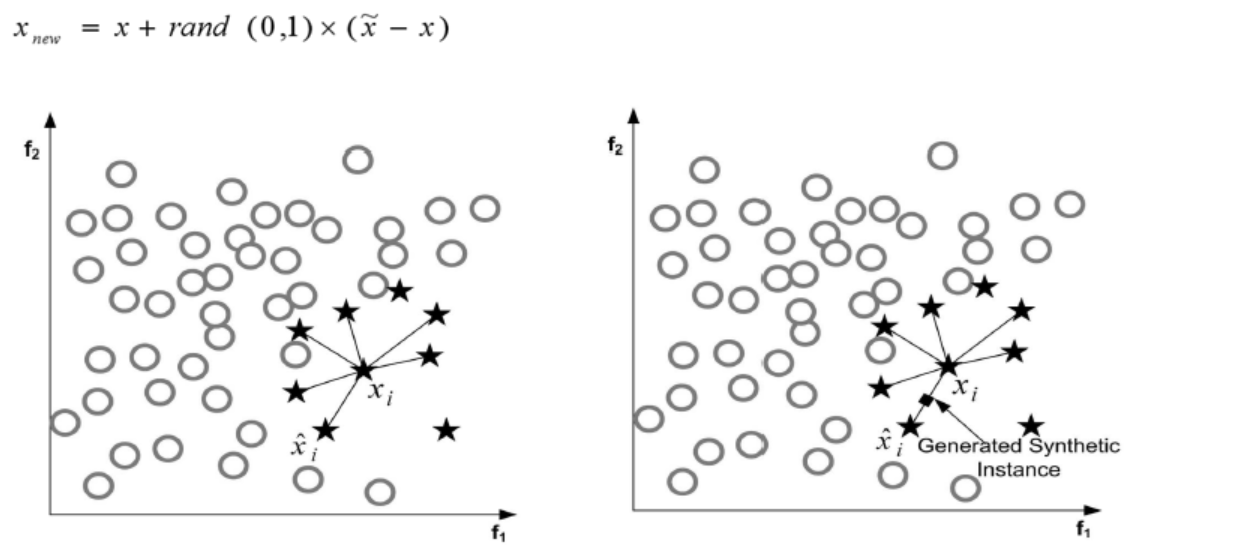

In [193]:
#用SMOTE算法进行上采样
from imblearn.over_sampling import SMOTE
SMO= SMOTE(random_state=4) 
over_samples_x,over_samples_y = SMO.fit_sample(x_train, y_train)
pd.Series(over_samples_y).value_counts()

1    37894
0    37894
dtype: int64

In [194]:
over_samples_x.shape

(75788, 14)

# 建模

## knn

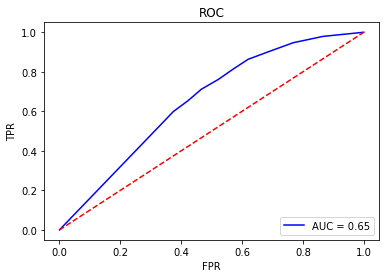

In [351]:
from sklearn.metrics import roc_curve, auc
from sklearn import neighbors
import matplotlib.pyplot as plt
%matplotlib inline
knn = neighbors.KNeighborsClassifier(n_neighbors=10)    #网格搜索交叉验证进行优化
best_model = knn.fit(over_samples_x, over_samples_y) 
predict_proba = best_model.predict_proba(x_test) #输出概率
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

## 决策树模型

In [352]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
dtc = DecisionTreeClassifier(random_state=0)
max_depth = np.arange(30, 50, 2)
hyperparameters = dict(max_depth=max_depth)
gridsearch = GridSearchCV(dtc, hyperparameters, cv=10, verbose=1, n_jobs=-1, scoring='roc_auc') #默认是准确率，这里采用auc面积
best_model = gridsearch.fit(over_samples_x, over_samples_y)
best_model.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   19.0s finished


{'max_depth': 34}

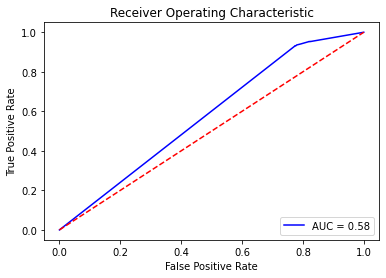

In [353]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline
predict_proba = best_model.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 随机森林

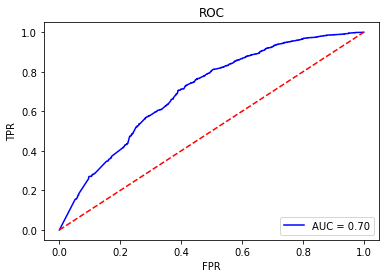

In [354]:
rf_model = RandomForestClassifier(n_estimators=200, oob_score=True, n_jobs=-1, random_state=0)
best_model = rf_model.fit(over_samples_x, over_samples_y)
predict_proba = best_model.predict_proba(x_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

## xgboost

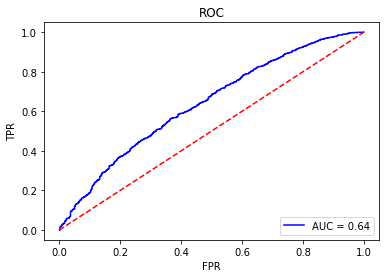

In [355]:
#没有调参情况
from xgboost import XGBClassifier as XGBC 
xgboost_model = XGBC()
xgboost_model.fit(over_samples_x,over_samples_y)
predict_proba = xgboost_model.predict_proba(x_test.values)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
#简单调参
from xgboost import XGBClassifier as XGBC 
xgboost_model = XGBC(n_jobs=-1,verbosity=2)
#三个最重要的参数：树的数目、树的深度和学习率
params = {
        'n_estimators':range(100,300,50),
        'max_depth':range(5,15,2),
        'learning_rate':np.linspace(0.01,0.2,10),
        }
grid_search=GridSearchCV(xgboost_model,param_grid=params,cv=5,verbose=2, n_jobs=-1, scoring='roc_auc')
grid_search.fit(over_samples_x,over_samples_y)
grid_search.best_params_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.3min


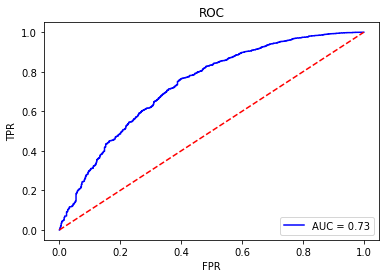

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
predict_proba = grid_search.predict_proba(x_test.values)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)#求面积
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [ ]:
#多参数调节调参
from xgboost import XGBClassifier as XGBC 
xgboost_model = XGBC(n_jobs=-1,verbosity=2)
params = {
        'n_estimators':range(100,200,50),
        'max_depth':range(5,15,4),
        'learning_rate':np.linspace(0.01,0.2,5),
        'subsample':[0.7,0.8,0.9,1],
        'colsample_bytree':[0.7,0.8,0.9,1],
        'gamma':np.linspace(0,1,10),
         'reg_lambda':np.linspace(0,2,10)
        }
grid_search=GridSearchCV(xgboost_model,param_grid=params,cv=5,verbose=2, n_jobs=-1, scoring='roc_auc')
grid_search.fit(over_samples_x,over_samples_y)
grid_search.best_params_